In [1]:
import os,sys,inspect
# current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parent_dir = os.path.dirname(current_dir)
# sys.path.insert(0, parent_dir) 
os.chdir('../')

from detector.detector import *
from preprocessing.deconvolution import *
from simulator.utils import *
import numpy as np
import matplotlib.pyplot as plt
from images import *
import imageio
from PIL import Image
# print(parent_dir)


In [2]:
print(os.getcwd())

c:\Users\CheLiu\Documents\research\Ultracold\Ultracode\SingleAtomDetection


In [3]:

def show_jpg(img):    
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.show()    



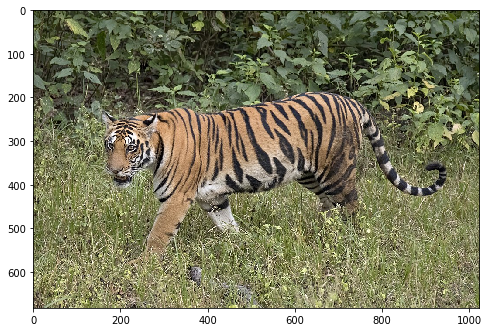

In [4]:
"""Original image"""
img_loc = 'images/tiger.jpg'

img = imageio.imread(img_loc)/255
show_jpg(img)



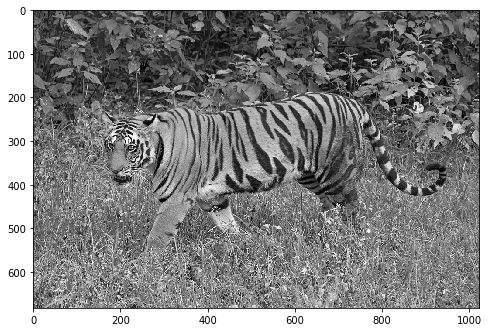

In [11]:
"""convert to grey image"""
graying = np.array(Image.fromarray(np.uint8(255*img)).convert('L')) / 255
plt.figure(figsize=(8,6))
plt.imshow(graying, cmap='gray')

In [18]:
"""
Tasks:
1. test fourier: make sure F*G = f X g
//2. convert img to grey scale
3. do a low pass filtering in fourier space see if reduces noise
4. implement deconvolution.py
5. analysis of the result 



"""


Sanity Checks For Fourier Transform
----------------------

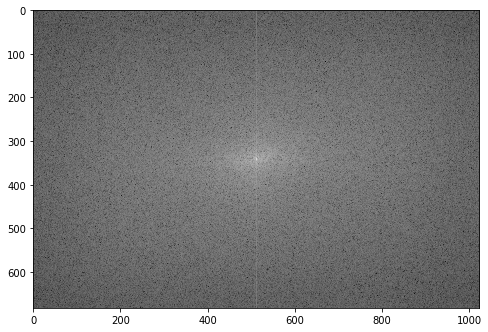

In [50]:
graying_fourier = np.fft.fftshift(np.fft.fft2(graying))
# plt.imshow(graying_fourier)
plt.figure(figsize=(8,6))
plt.imshow(np.log(np.abs(graying_fourier)+1e-8), cmap='gray')

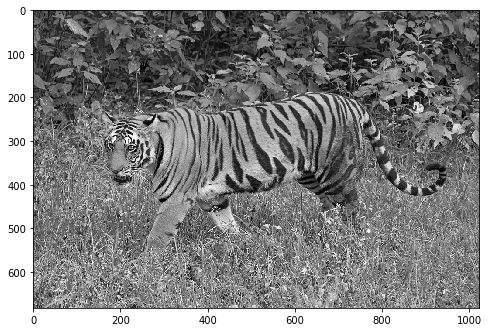

In [45]:
""" Inverse Fourier transform to restore the original image"""
graying_restore = np.fft.ifft2(graying_fourier)
plt.figure(figsize=(8,6))
plt.imshow(np.abs(graying_restore), cmap='gray')

Fourier Transform of Two Dots:
-----------------------------------

Suppose the two dots are located at $x_1$ and $x_2$, modeled by $\delta(x-x_1) \delta(y-0)$ and $\delta(x-x_2) \delta(y-0)$

The the Fourier Transform:
$$\int \int (\delta(x-x_1)\delta(y-0) +\delta(x-x_2)\delta(y-0)) e^{-ixk_x} e^{-iyk_y} dxdy$$
$$= e^{-ix_1k_x} + e^{-ix_2k_x}$$
$$= \cos(x_1k_x) + \cos(x_2k_x) - i\sin(x_1k_x) - i\sin(x_2k_x) $$
So the abs of the result
$$\sqrt{(\cos(x_1k_x) + \cos(x_2k_x))^2 + (\sin(x_1k_x) + \sin(x_2k_x))^2}$$
$$= \sqrt{2 + 2(\cos(x_1k_x)\cos(x_2k_x) + \sin(x_1k_x) \sin(x_2k_x))}$$
$$= \sqrt{2 + 2 \cos(x_1k_x - x_2k_x)}$$

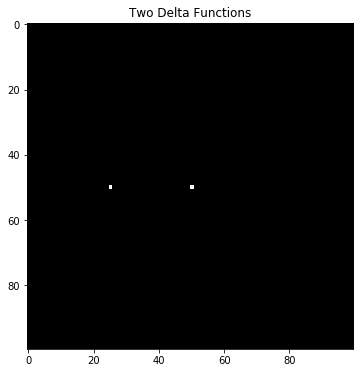

In [65]:
a = np.zeros((100,100))
a[a.shape[0]//2, a.shape[1]//2] = 1000
a[a.shape[0]//2, a.shape[1]//4] = 1000
plt.figure(figsize=(8,6))
plt.title("Two Delta Functions")
plt.imshow(a, cmap='gray')



In [55]:
a_fourier = np.fft.fftshift(np.fft.fft2(a))

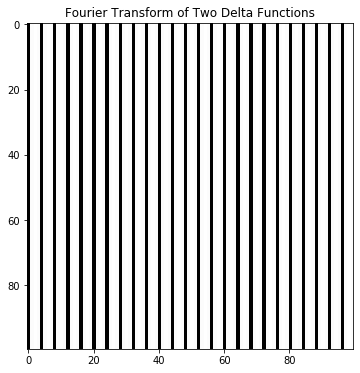

In [64]:
plt.figure(figsize=(8,6))
plt.title("Fourier Transform of Two Delta Functions")
plt.imshow(np.log(np.abs(a_fourier)+1e-8), cmap='gray')


Low Pass Filter in Fourier Space
--------------------------------
We can convolve a mask with an image in the original space, equivalently, we can also multiple the fourier transform of the image and the mask in fourier space to produce the same result. In Fourier space it is easier to implement a low pass filter. One just need to define a straight cut off in the fourier space. This is because Fourier space is essentially a frequency space

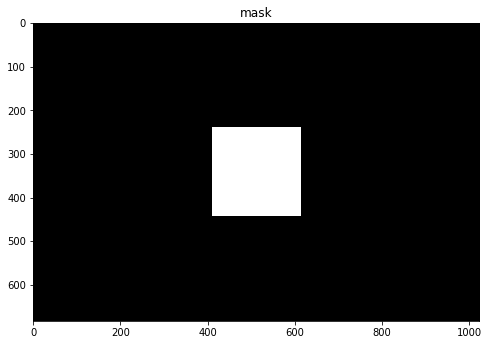

In [71]:
low_pass_mask = np.zeros(graying_fourier.shape)
H, W = low_pass_mask.shape
mask_height, mask_width = H // 5, W // 5
x = (H - mask_width) // 2
y = (W - mask_width) // 2 
low_pass_mask[x:x+mask_width, y:y+mask_width] = 1

plt.figure(figsize=(8,6))
plt.title("mask")
plt.imshow(low_pass_mask, cmap='gray')

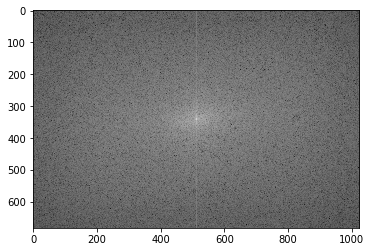

In [72]:
plt.imshow(np.log(np.abs(graying_fourier)+1e-8), cmap='gray')

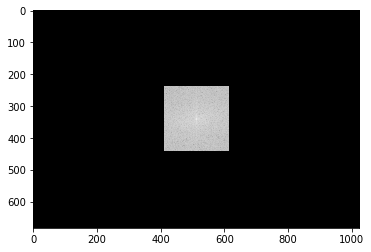

In [73]:
filtered_graying_fourier = low_pass_mask * graying_fourier
plt.imshow(np.log(np.abs(filtered_graying_fourier)+1e-8), cmap='gray')

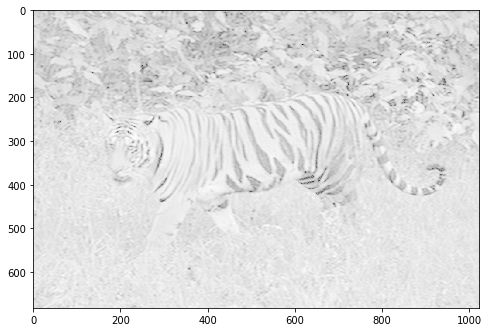

In [79]:
restored_filtered_graying = np.fft.ifft2(filtered_graying_fourier)
plt.figure(figsize=(8,6))
plt.imshow(np.log(np.abs(restored_filtered_graying) + 1e-8), cmap='gray')

Low Pass Filter Applied to An Atom
-----------------------------

In [81]:
from simulator.utils import *

In [82]:
sim = simulator(100, 0.1)
sim.create_simulation()